In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import numpy as np

In [2]:
path = '/uscms/home/jieun201/nobackup/YOURWORKINGAREA/june23_ds8_labelsOnly'
csv_files = glob.glob(path + "/*.csv")
df_labels = (pd.read_csv(file) for file in csv_files)
big_df_labels   = pd.concat(df_labels, ignore_index=True)

In [3]:
#big_df_labels

In [4]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TestSetTruePT.csv')
df2 = pd.read_csv('/home/jieun201/redo_dec6_dec8_FP/predictionsFiles.csv')
df3 = pd.read_csv('/home/jieun201/redo_dec6_dec8_FP/true.csv')
df2.columns.values[0] = "predict"
df3.columns.values[0] = "true"
df2['predict'] = df2['predict'].astype(int)
concatenate = pd.concat([df1,df2, df3], axis=1)
concatenate
concatenatePos = concatenate[concatenate['pt']>0]

In [5]:
s2 = pd.Series(df1['pt'])
BigSampleValueCounts2 = s2.value_counts(bins=[0,0.14,0.18,0.22,0.28,0.36,0.44,0.56,0.70,0.88,1.11,1.40,1.76,2.19,2.80,3.52,4.43,10]).sort_index()
testSetTotalCounts = np.array(BigSampleValueCounts2)
testSetTotalCounts


array([ 2724, 18742, 20584,  4038,  5334,  4658,  5753,  4997,  4531,
        3662,  2667,  1742,  1048,   594,   285,   126,    35])

In [6]:
concatPosPredictRight1 = concatenatePos[(concatenatePos['predict'] ==1) | (concatenatePos['predict'] ==2)]
concatPosPredictRight1

,pt,predict,true
1,0.195180,2,2
2,1.338710,2,0
3,0.180981,2,2
5,0.283597,2,0
7,0.293011,2,0
...,...,...,...
163021,0.186738,2,2
163022,0.186347,2,2
163027,0.199958,2,2
163035,0.395177,2,0


<Axes: >

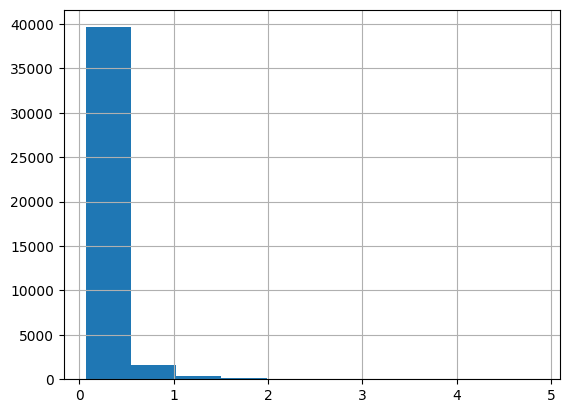

In [7]:
concatPosPredictRight1['pt'].hist()

In [8]:
s3 = pd.Series(concatPosPredictRight1['pt'])
BigSampleValueCounts3 = s3.value_counts(bins=[0,0.14,0.18,0.22,0.28,0.36,0.44,0.56,0.70,0.88,1.11,1.40,1.76,2.19,2.80,3.52,4.43,10]).sort_index()
testSetAs12 = np.array(BigSampleValueCounts3)
testSetAs12

array([ 2550, 15472, 14985,  2189,  2046,  1259,  1187,   716,   515,
         392,   248,   139,    92,    37,    26,     8,     2])

In [9]:
#new Ratio based on efficiency
array1 = np.array([0.07,0.20,0.36,0.46,0.59,0.70,0.79,0.84,0.87,0.89,0.90,0.90,0.91,0.91,0.92,0.92,0.92])
array2 = 1/array1
array2

array([14.28571429,  5.        ,  2.77777778,  2.17391304,  1.69491525,
        1.42857143,  1.26582278,  1.19047619,  1.14942529,  1.12359551,
        1.11111111,  1.11111111,  1.0989011 ,  1.0989011 ,  1.08695652,
        1.08695652,  1.08695652])

In [10]:
Sum = np.dot(testSetAs12,array2)
Sum

169436.83985516845

In [11]:
estimateHowManyTruth = np.dot(testSetTotalCounts,array2)
estimateHowManyTruth

244017.09586740297

In [12]:
Eff = Sum/estimateHowManyTruth
Eff

0.6943646274162657